In [139]:
import json
import networkx as nx
import matplotlib.pyplot as plt

# Reading and Validating the JSON Data
# Load the JSON file
with open("Vijay_s_Project (1).json", "r") as file:
    data = json.load(file)

# Validate JSON structure
for pair in data:
    if "Donor" not in pair or "Recipient" not in pair:
        raise ValueError(f"Invalid entry: {pair}")

# Summary statistics
total_pairs = len(data)
print(f"Total donor-recipient pairs: {total_pairs}")
print(data)  # Display a sample of the dataset

Total donor-recipient pairs: 722
[{'Recipient': 'O', 'Donor': ['B', 'A']}, {'Recipient': 'B', 'Donor': ['A']}, {'Recipient': 'A', 'Donor': ['B']}, {'Recipient': 'A', 'Donor': ['AB', 'B']}, {'Recipient': 'A', 'Donor': ['AB', 'B']}, {'Recipient': 'B', 'Donor': ['AB', 'A']}, {'Recipient': 'O', 'Donor': ['AB']}, {'Recipient': 'O', 'Donor': ['AB', 'A', 'B']}, {'Recipient': 'O', 'Donor': ['A']}, {'Recipient': 'O', 'Donor': ['AB', 'B', 'A']}, {'Recipient': 'B', 'Donor': ['AB']}, {'Recipient': 'B', 'Donor': ['A']}, {'Recipient': 'O', 'Donor': ['A']}, {'Recipient': 'B', 'Donor': ['A']}, {'Recipient': 'O', 'Donor': ['AB', 'B', 'A']}, {'Recipient': 'B', 'Donor': ['AB', 'A']}, {'Recipient': 'A', 'Donor': ['AB', 'B']}, {'Recipient': 'A', 'Donor': ['B']}, {'Recipient': 'O', 'Donor': ['AB', 'B']}, {'Recipient': 'A', 'Donor': ['AB']}, {'Recipient': 'O', 'Donor': ['AB', 'A', 'B']}, {'Recipient': 'B', 'Donor': ['A']}, {'Recipient': 'O', 'Donor': ['B', 'A']}, {'Recipient': 'O', 'Donor': ['AB', 'B']}, {'R

In [141]:
# Create a Directed Graph
# Initialize graph
G = nx.DiGraph()

# Define node names based on donor-recipient pairs for clarity
for i, element in enumerate(data):
    donor = tuple(element["Donor"])  # Ensure donors are tuples for hashability
    recipient = element["Recipient"]
    G.add_node(i, Donor=donor, Recipient=recipient)  # Add nodes with metadata

In [143]:
# Add Edges Based on Compatibility
# Compatibility rules for donor-recipient matching
donor_recipient_compatibility = {
    "O": ["O", "A", "B", "AB"],
    "A": ["A", "AB"],
    "B": ["B", "AB"],
    "AB": ["AB"]
}

# Add edges based on compatibility
for u in G.nodes(data=True):
    donor = u[1]["Donor"]
    for blood_group in donor:
        for v in G.nodes(data=True):
            if u[0] == v[0]:  # Skip self-loops
                continue
            recipient = v[1]["Recipient"]
            if recipient in donor_recipient_compatibility[blood_group]:
                G.add_edge(u[0], v[0])  # Add edge if compatible

# Validate the graph
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")

Number of nodes: 722
Number of edges: 173790


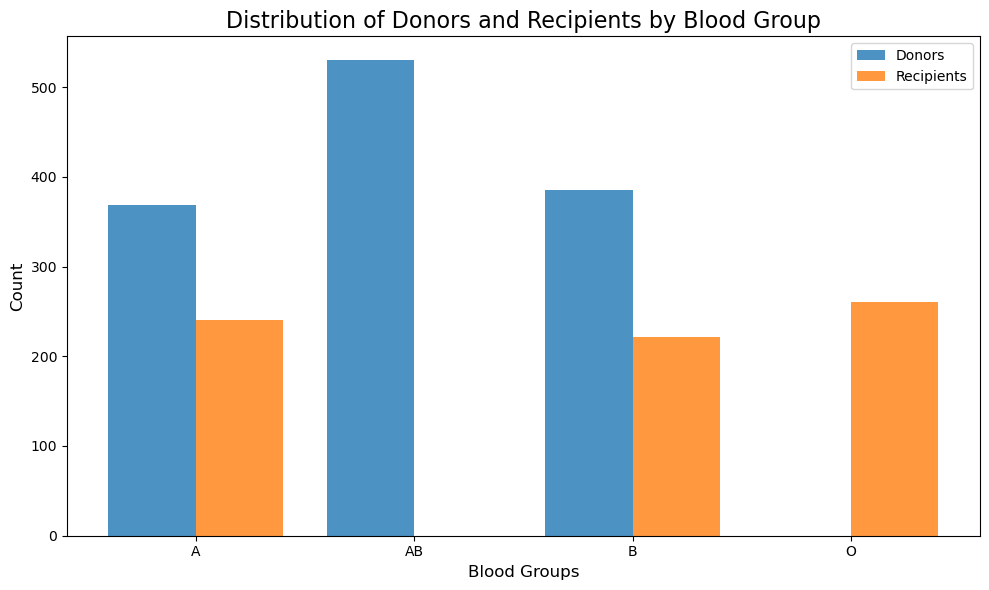

In [145]:
# Donor and Recipient Distribution Visualization
# Count donors and recipients by blood group
donor_counts = {}
recipient_counts = {}

for node in G.nodes(data=True):
    recipient = node[1]["Recipient"]
    if recipient not in recipient_counts:
        recipient_counts[recipient] = 0
    recipient_counts[recipient] += 1

    for donor in node[1]["Donor"]:
        if donor not in donor_counts:
            donor_counts[donor] = 0
        donor_counts[donor] += 1

# Create bar chart
blood_groups = sorted(set(donor_counts.keys()).union(set(recipient_counts.keys())))
donor_values = [donor_counts.get(bg, 0) for bg in blood_groups]
recipient_values = [recipient_counts.get(bg, 0) for bg in blood_groups]

plt.figure(figsize=(10, 6))
x = range(len(blood_groups))
width = 0.4
plt.bar(x, donor_values, width, label="Donors", alpha=0.8)
plt.bar([p + width for p in x], recipient_values, width, label="Recipients", alpha=0.8)
plt.xlabel("Blood Groups", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Distribution of Donors and Recipients by Blood Group", fontsize=16)
plt.xticks([p + width / 2 for p in x], blood_groups)
plt.legend()
plt.tight_layout()
plt.show()

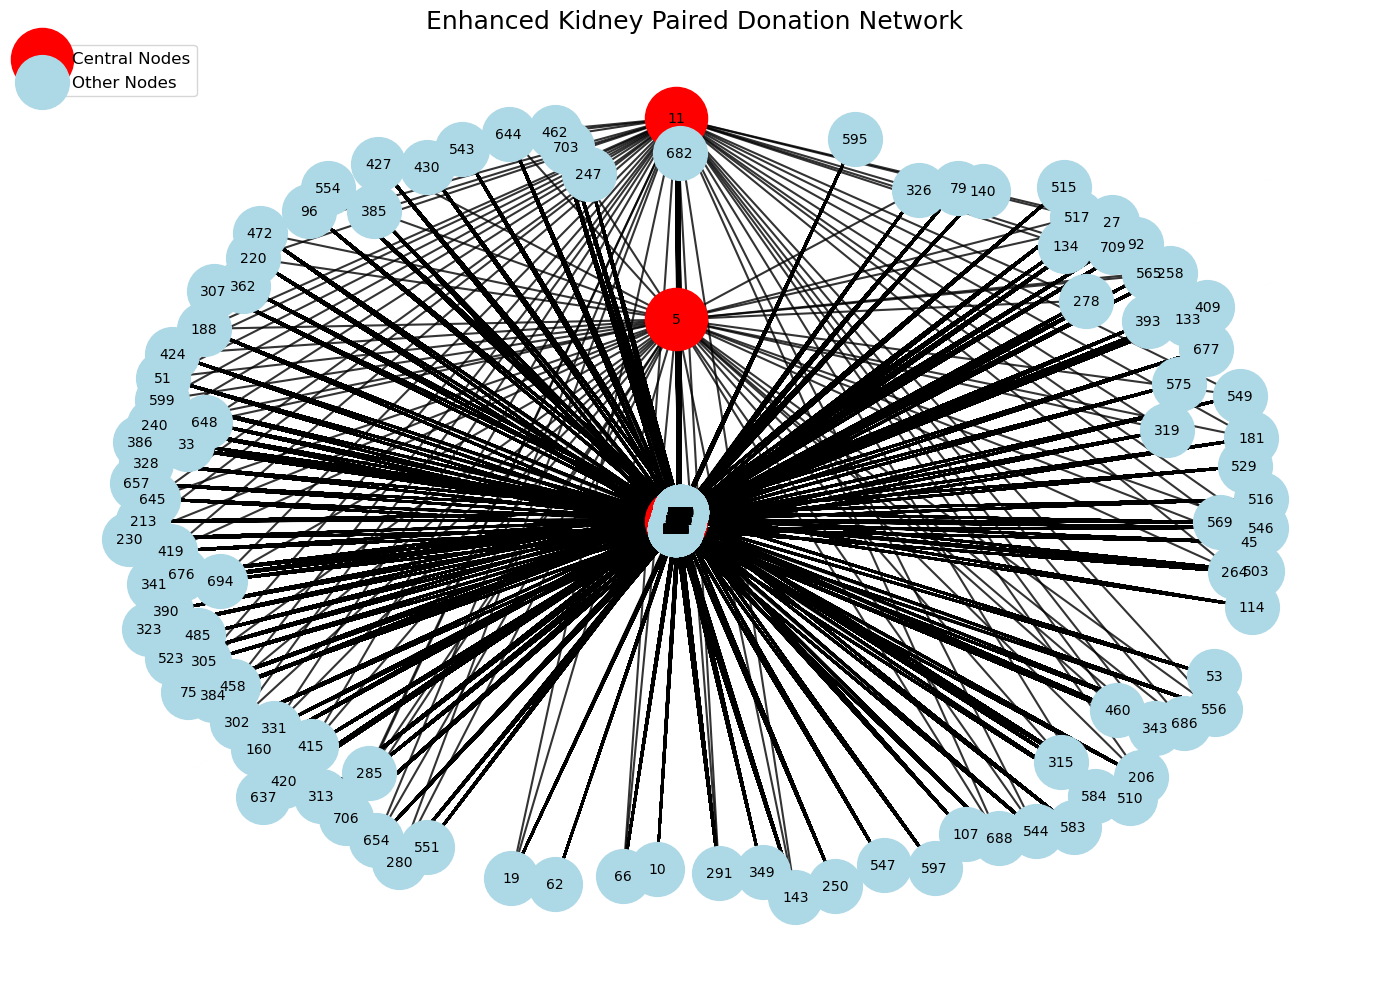

In [85]:
import matplotlib.pyplot as plt
import networkx as nx

# Step 1: Remove unnecessary central nodes
nodes_to_remove = [node for node in G.nodes if node not in {1, 5, 11} and G.degree[node] < 3]
G.remove_nodes_from(nodes_to_remove)

# Step 2: Create a layout with specified central nodes
central_node_ids = [1, 5, 11]  # Nodes to be placed in the center
pos = nx.spring_layout(G, seed=42)  # Generate layout

# Adjust positions for central nodes to be more central
for idx, node in enumerate(central_node_ids):
    pos[node] = (0, idx * 0.5)  # Align nodes vertically in the middle

plt.figure(figsize=(14, 10))

# Step 3: Draw nodes with distinct colors for central, donor, and recipient nodes
donor_nodes = [node for node in G.nodes if node not in central_node_ids]
nx.draw_networkx_nodes(G, pos, nodelist=central_node_ids, node_size=2000, node_color="red", label="Central Nodes")
nx.draw_networkx_nodes(G, pos, nodelist=donor_nodes, node_size=1500, node_color="lightblue", label="Other Nodes")

# Step 4: Draw edges as black arrows
nx.draw_networkx_edges(
    G, pos, edgelist=G.edges, edge_color="black", arrowstyle="->", arrowsize=15, width=1.5, alpha=0.8
)

# Step 5: Add labels to nodes
nx.draw_networkx_labels(G, pos, labels={node: str(node) for node in G.nodes}, font_size=10, font_color="black")

# Step 6: Add a legend and title
plt.title("Enhanced Kidney Paired Donation Network", fontsize=18)
plt.legend(scatterpoints=1, loc="upper left", fontsize=12)
plt.axis("off")  # Turn off axes
plt.tight_layout()

# Show the graph
plt.show()


In [147]:
# Central Nodes and Analysis
# Identify central nodes based on degree
central_nodes = sorted(G.degree, key=lambda x: x[1], reverse=True)[:3]  # Top 3 nodes

# Display central nodes and their attributes
print("Central Nodes:")
for node, degree in central_nodes:
    print(f"Node: {node}, Degree: {degree}, Attributes: {G.nodes[node]}")
    print(f"Edges for Node {node}: {list(G.edges(node))}")


Central Nodes:
Node: 1, Degree: 625, Attributes: {'Donor': ('A',), 'Recipient': 'B'}
Edges for Node 1: [(1, 2), (1, 3), (1, 4), (1, 16), (1, 17), (1, 19), (1, 26), (1, 27), (1, 28), (1, 39), (1, 41), (1, 44), (1, 45), (1, 51), (1, 56), (1, 59), (1, 60), (1, 65), (1, 66), (1, 67), (1, 72), (1, 77), (1, 78), (1, 84), (1, 88), (1, 89), (1, 98), (1, 101), (1, 103), (1, 104), (1, 110), (1, 113), (1, 126), (1, 136), (1, 139), (1, 141), (1, 143), (1, 145), (1, 146), (1, 148), (1, 151), (1, 152), (1, 153), (1, 157), (1, 163), (1, 164), (1, 166), (1, 171), (1, 174), (1, 177), (1, 181), (1, 182), (1, 185), (1, 186), (1, 188), (1, 196), (1, 197), (1, 198), (1, 200), (1, 206), (1, 219), (1, 220), (1, 222), (1, 223), (1, 224), (1, 227), (1, 228), (1, 229), (1, 230), (1, 231), (1, 232), (1, 233), (1, 238), (1, 240), (1, 246), (1, 249), (1, 255), (1, 258), (1, 259), (1, 264), (1, 266), (1, 271), (1, 273), (1, 278), (1, 280), (1, 284), (1, 285), (1, 290), (1, 291), (1, 293), (1, 295), (1, 302), (1, 30

In [ ]:
from gurobipy import Model, GRB, quicksum

# Identify 3-Cycles
# Prepare a list to store valid 3-cycles
cycle_3 = []  

# Find valid 3-cycles
for u in G.nodes:
    for v in G.successors(u):
        for k in G.successors(v):
            if u != v and v != k and k != u:  # Ensure distinct nodes
                if u in G.successors(k):  # Check for a cycle
                    cycle_3.append((u, v, k, u))  # Add the complete cycle

# Display a sample and total count
print("Sample 3-cycles:", cycle_3[:5])  # Limit output for readability
print(f"Total number of 3-cycles: {len(cycle_3)}")


In [113]:
# Step 1: Prepare a list to store valid 2-cycles
cycle_2 = []  # This list will hold all valid directed cycles of length 2

# Step 2: Mark all edges as not visited initially
for (i, j) in G.edges:  # Loop through all edges in the graph
    G.edges[(i, j)]["visited"] = False  # Add a "visited" flag to each edge and set it to False

# Step 3: Search for cycles of length 2
for (i, j) in G.edges:  # Check each edge in the graph
    if G.edges[(i, j)]["visited"]:  # Skip the edge if it has already been processed
        continue
    if (j, i) in G.edges:  # Check if there is a reverse edge forming a 2-cycle
        cycle_2.append((i, j, i))  # Add the cycle (i → j → i) to the list
        G.edges[(j, i)]["visited"] = True  # Mark the reverse edge as already considered to avoid duplication

# Step 4: Print all cycles of length 2
print("Cycles of length 2:", cycle_2)  # Display the list of 2-cycles


Cycles of length 2: [(1, 2, 1), (1, 3, 1), (1, 4, 1), (1, 16, 1), (1, 17, 1), (1, 26, 1), (1, 28, 1), (1, 39, 1), (1, 41, 1), (1, 44, 1), (1, 56, 1), (1, 59, 1), (1, 60, 1), (1, 65, 1), (1, 67, 1), (1, 72, 1), (1, 77, 1), (1, 78, 1), (1, 84, 1), (1, 88, 1), (1, 89, 1), (1, 98, 1), (1, 101, 1), (1, 103, 1), (1, 104, 1), (1, 110, 1), (1, 113, 1), (1, 126, 1), (1, 136, 1), (1, 139, 1), (1, 141, 1), (1, 145, 1), (1, 146, 1), (1, 148, 1), (1, 151, 1), (1, 152, 1), (1, 153, 1), (1, 157, 1), (1, 163, 1), (1, 164, 1), (1, 166, 1), (1, 171, 1), (1, 174, 1), (1, 177, 1), (1, 182, 1), (1, 185, 1), (1, 186, 1), (1, 196, 1), (1, 197, 1), (1, 198, 1), (1, 200, 1), (1, 219, 1), (1, 222, 1), (1, 223, 1), (1, 224, 1), (1, 227, 1), (1, 228, 1), (1, 229, 1), (1, 231, 1), (1, 232, 1), (1, 233, 1), (1, 238, 1), (1, 246, 1), (1, 249, 1), (1, 255, 1), (1, 259, 1), (1, 266, 1), (1, 271, 1), (1, 273, 1), (1, 284, 1), (1, 290, 1), (1, 293, 1), (1, 295, 1), (1, 304, 1), (1, 314, 1), (1, 320, 1), (1, 322, 1), (1,

In [115]:
# Count Cycles
# Count and display the total number of 2-cycles and 3-cycles
cycle_2_length = len(cycle_2)
cycle_3_length = len(cycle_3)
print(f"Total 2-cycles: {cycle_2_length}")
print(f"Total 3-cycles: {cycle_3_length}")

Total 2-cycles: 31897
Total 3-cycles: 0


In [117]:
# Optimization Model with Gurobi
# Initialize the Gurobi model
model = Model("Kidney_Paired_Donation")

# Define decision variables for 2-cycles and 3-cycles
x_2 = model.addVars(cycle_2, vtype=GRB.BINARY, name="x_2")  # Binary vars for 2-cycles
x_3 = model.addVars(cycle_3, vtype=GRB.BINARY, name="x_3")  # Binary vars for 3-cycles

# Objective: Maximize the total number of matches (2-cycles and 3-cycles)
model.setObjective(
    quicksum(x_2[c] * 2 for c in cycle_2) + quicksum(x_3[c] * 3 for c in cycle_3),
    GRB.MAXIMIZE
)

# Add constraints to ensure donors and recipients participate in at most one cycle
for node in G.nodes:
    model.addConstr(
        quicksum(x_2[c] for c in cycle_2 if node in c) +
        quicksum(x_3[c] for c in cycle_3 if node in c) <= 1,
        name=f"Participation_{node}"
    )

# Solve the optimization problem
model.optimize()

# Retrieve and display the solution
if model.status == GRB.OPTIMAL:
    matched_cycles_2 = [c for c in cycle_2 if x_2[c].x > 0.5]
    matched_cycles_3 = [c for c in cycle_3 if x_3[c].x > 0.5]
    print("Matched 2-cycles:", matched_cycles_2)
    print("Matched 3-cycles:", matched_cycles_3)
    print(f"Total Matches: {len(matched_cycles_2) * 2 + len(matched_cycles_3) * 3}")
else:
    print("No optimal solution found.")


Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (win64 - Windows 11+.0 (22631.2))

CPU model: 11th Gen Intel(R) Core(TM) i5-1135G7 @ 2.40GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 722 rows, 31897 columns and 63794 nonzeros
Model fingerprint: 0xe2b61deb
Variable types: 0 continuous, 31897 integer (31897 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [2e+00, 2e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Found heuristic solution: objective 334.0000000
Presolve removed 364 rows and 0 columns
Presolve time: 0.19s
Presolved: 358 rows, 31897 columns, 63794 nonzeros
Variable types: 0 continuous, 31897 integer (31897 binary)

Starting sifting (using dual simplex for sub-problems)...

    Iter     Pivots    Primal Obj      Dual Obj        Time
       0          0     infinity     -7.1400000e+02      0s
       1        454  -2.2000

In [119]:
import pandas as pd

# Calculate Success Percentage
# Total donor-recipient pairs from the dataset
total_pairs = len(data)

# Total matches from the optimization solution
total_matches = len(matched_cycles_2) * 2 + len(matched_cycles_3) * 3

# Calculate the percentage of successful transplants
success_percentage = (total_matches / total_pairs) * 100

# Display the result
print(f"Total Pairs: {total_pairs}")
print(f"Successful Matches: {total_matches}")
print(f"Percentage of Successful Transplants: {success_percentage:.2f}%")

Total Pairs: 722
Successful Matches: 334
Percentage of Successful Transplants: 46.26%


In [121]:
# Compatibility Analysis
# Calculate the total compatibility for each node
node_compatibility_counts = {}

for node in G.nodes:
    in_degree = G.in_degree(node)
    out_degree = G.out_degree(node)
    total_degree = in_degree + out_degree
    node_compatibility_counts[node] = total_degree

# Calculate percentage compatibility for each node
total_compatibility = sum(node_compatibility_counts.values())
node_percentage_chances = [
    {
        "Node": node,
        "Total Degree (Compatibility Count)": count,
        "Percentage Chance (%)": (count / total_compatibility) * 100
    }
    for node, count in node_compatibility_counts.items()
]

# Create a DataFrame for organized display
compatibility_df = pd.DataFrame(node_percentage_chances).round(2)
print("Node Compatibility Analysis:")
print(compatibility_df.to_string(index=False))

Node Compatibility Analysis:
 Node  Total Degree (Compatibility Count)  Percentage Chance (%)
    0                                 462                   0.13
    1                                 625                   0.18
    2                                 590                   0.17
    3                                 590                   0.17
    4                                 590                   0.17
    5                                 625                   0.18
    6                                   0                   0.00
    7                                 462                   0.13
    8                                 240                   0.07
    9                                 462                   0.13
   10                                 385                   0.11
   11                                 625                   0.18
   12                                 240                   0.07
   13                                 625                   0

In [123]:
# Unmatched Pairs
# Calculate unmatched pairs
unmatched_pairs = total_pairs - total_matches
unmatched_percentage = (unmatched_pairs / total_pairs) * 100

# Display the results
print(f"Unmatched Pairs: {unmatched_pairs}")
print(f"Unmatched Percentage: {unmatched_percentage:.2f}%")


Unmatched Pairs: 388
Unmatched Percentage: 53.74%


In [125]:
# Donor Utilization
# Total donors with outgoing edges
total_donors = len({node for node in G.nodes if G.out_degree(node) > 0})

# Matched donors
matched_donors = set([u for c in matched_cycles_2 for u in c[:2]] + [u for c in matched_cycles_3 for u in c[:3]])

# Calculate donor utilization percentage
donor_utilization_percentage = (len(matched_donors) / total_donors) * 100

# Display the result
print(f"Total Donors: {total_donors}")
print(f"Matched Donors: {len(matched_donors)}")
print(f"Donor Utilization Percentage: {donor_utilization_percentage:.2f}%")

Total Donors: 612
Matched Donors: 334
Donor Utilization Percentage: 54.58%


In [127]:
# Recipient Satisfaction
# Total recipients with incoming edges
total_recipients = len({node for node in G.nodes if G.in_degree(node) > 0})

# Matched recipients
matched_recipients = set([v for c in matched_cycles_2 for v in c[:2]] + [v for c in matched_cycles_3 for v in c[:3]])

# Calculate recipient satisfaction percentage
recipient_satisfaction_percentage = (len(matched_recipients) / total_recipients) * 100

# Display the result
print(f"Total Recipients: {total_recipients}")
print(f"Matched Recipients: {len(matched_recipients)}")
print(f"Recipient Satisfaction Percentage: {recipient_satisfaction_percentage:.2f}%")

Total Recipients: 462
Matched Recipients: 334
Recipient Satisfaction Percentage: 72.29%


In [129]:
# Graph connectivity percentage
total_possible_edges = len(G.nodes) * (len(G.nodes) - 1)
connectivity_percentage = (len(G.edges) / total_possible_edges) * 100
print(f"Graph Connectivity Percentage: {connectivity_percentage:.2f}%")


Graph Connectivity Percentage: 33.39%
